<a href="https://colab.research.google.com/github/radicalcoder/ML-Project/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import matplotlib
import matplotlib.pyplot as plt
import skimage
import skimage.data
import skimage.transform
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from keras import models
from keras.preprocessing import image
from PIL import Image
from keras.models import Sequential
import keras
import PIL
from skimage import io
from skimage import color
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout



# To read the data directory from repository on github.
%matplotlib inline
!git clone -l -s https://github.com/radicalcoder/ML-Project.git data
%cd data
!ls

Using TensorFlow backend.


Cloning into 'data'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 7421 (delta 44), reused 0 (delta 0), pack-reused 7349
Receiving objects: 100% (7421/7421), 248.14 MiB | 27.85 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Checking out files: 100% (7225/7225), done.
/content/data
BelgiumTSC_Testing   MLP_final_initialdraft.ipynb  README.md
BelgiumTSC_Training  MLP.ipynb			   traffic.py


In [0]:
def data_loader(data_dir):
    """
    The data set is read into two lists, as follows:
    list labels[] -> a list of numbers, where each number represents a unique image label.
    list images[] -> a list of arrays, where each array represents a single image.
    
    The data set directory contains multiple subdirectories. We read all these 
    subdirectories into a list subdirs[]. Since the subfolders are read in a random order, the list
    is also in a random order. We then sort this array using the sort() function.
    """
    
    subdirs = []
    for i in os.listdir(data_dir):
      if os.path.isdir(data_dir + i):   # There may be .txt files in the data_dir hence we need to check
        subdirs.append(i)

    subdirs.sort()
    
    """
    Data is now collected into two lists - labels & images - while looping through the 
    list subdirs[].    
    """

    labels = []
    images = []
    for i in subdirs:
        label_dir = data_dir + i
        #print(label_dir)
        f_names=[]
        for f in os.listdir(label_dir):
          if f.endswith(".ppm"):   # only files that end in .ppm are image files
            f_names.append(label_dir + '/' + f)
        # print(f_names)
        """
        Now for each label, append all its images into the list images[] and 
        append its label number in the list labels[]. 
        """
        
        for f in f_names:
            images.append(skimage.data.imread(f))   #use parameter as_grey??
            labels.append(int(i))
    return labels, images


# Loading the training and testing dataset using the function data_loader().
training_data_dir = "BelgiumTSC_Training/Training/"
testing_data_dir = "BelgiumTSC_Testing/Testing/"

training_labels, training_images = data_loader(training_data_dir)
testing_labels, testing_images = data_loader(testing_data_dir)
#print(labels)

In [0]:
print("No of unique Labels in Training Data: ", len(set(training_labels)), "\nTotal number of Images in Training Data: ", len(training_images)) 
print("No of unique Labels in Testing Data: ", len(set(testing_labels)), "\nTotal number of Images in Testing Data: ", len(testing_images)) 

No of unique Labels in Training Data:  62 
Total number of Images in Training Data:  4575
No of unique Labels in Testing Data:  53 
Total number of Images in Testing Data:  2520


In [0]:
def display_images_and_labels(images, labels):
    #Display the first image of each label.
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image,cmap="gray")
    plt.show()


In [4]:
#Training Data
reshape_images_training=[]
grayscale_images_training=[]

for i in training_images:
  reshape_images_training.append(skimage.transform.resize(i,(32,32), mode ='constant'))

reshape_images_training= np.array(reshape_images_training)
#reshape_images_training = reshape_images_training.astype('float32')
print(reshape_images_training.shape)

for i in reshape_images_training:
  grayscale_images_training.append(color.rgb2gray(i))
  
grayscale_images_training= np.array(grayscale_images_training)  #Keras expects our images and labels to be in numpy arrays
#grayscale_images_training = reshape_images_training.astype('float32')

print("gray")
print(grayscale_images_training[0].shape)

image_expanded_training = grayscale_images_training[:, :, :, np.newaxis]  #converting images from 32x32 to 32x32x1
grayscale_images_training=image_expanded_training

print(grayscale_images_training[0].shape)

"""

#display_images_and_labels(training_images,training_labels)
#display_images_and_labels(grayscale_images_training, training_labels)

print("Grayscale Training images")
print(len(grayscale_images_training))
for i in grayscale_images_training[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

print("Reshaped Training Images ")

for i in reshape_images_training[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))
  
"""

(4575, 32, 32, 3)
gray
(32, 32)
(32, 32, 1)


'\n\n#display_images_and_labels(training_images,training_labels)\n#display_images_and_labels(grayscale_images_training, training_labels)\n\nprint("Grayscale Training images")\nprint(len(grayscale_images_training))\nfor i in grayscale_images_training[:10]:\n  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))\n\nprint("Reshaped Training Images ")\n\nfor i in reshape_images_training[:10]:\n  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))\n  \n'

In [5]:
#Testing Data
reshape_images_testing=[]
grayscale_images_testing=[]

for i in testing_images:
  reshape_images_testing.append(skimage.transform.resize(i,(32,32), mode ='constant'))

reshape_images_testing= np.array(reshape_images_testing)
#reshape_images_testing = reshape_images_testing.astype('float32')
print(reshape_images_testing.shape)

for i in reshape_images_testing:
  grayscale_images_testing.append(color.rgb2gray(i))
  
grayscale_images_testing= np.array(grayscale_images_testing)
#grayscale_images_testing = reshape_images_testing.astype('float32')

print("gray")
print(grayscale_images_testing[0].shape)

image_expanded_testing = grayscale_images_testing[:, :, :, np.newaxis]  #converting imags from 32x32 to 32x32x1
grayscale_images_testing=image_expanded_testing

print(grayscale_images_testing[0].shape)

  

#display_images_and_labels(testing_images,testing_labels)
#display_images_and_labels(grayscale_images_testing, testing_labels)

"""

print("Grayscale testing images")
print(len(grayscale_images_testing))
for i in grayscale_images_testing[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

print("Reshaped testing Images ")

for i in reshape_images_testing[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

"""

(2520, 32, 32, 3)
gray
(32, 32)
(32, 32, 1)


'\n\nprint("Grayscale testing images")\nprint(len(grayscale_images_testing))\nfor i in grayscale_images_testing[:10]:\n  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))\n\nprint("Reshaped testing Images ")\n\nfor i in reshape_images_testing[:10]:\n  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))\n\n'

In [6]:
#print(training_labels)
from keras.utils import to_categorical
#one-hot encode target column
labels_train = to_categorical(training_labels)
labels_test = to_categorical(testing_labels)
print(labels_train.shape)
print("\n")
print(type(labels_train))
print(training_labels[500])
print(labels_train[500])

#print(testing_labels)
print(labels_test.shape)
print("\n")
print(type(labels_test))
print(testing_labels[500])
print(labels_test[500])

(4575, 62)


<class 'numpy.ndarray'>
13
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(2520, 62)


<class 'numpy.ndarray'>
18
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:


from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model_gen = Sequential()
model_gen.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=grayscale_images_training[0].shape))  #When using this layer as the first layer in a model, we provide the keyword argument "input_shape"
#model_gen.add(Conv2D(32, (3, 3), activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25))
 
model_gen.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
#model_gen.add(Conv2D(64, (3, 3), activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25))
 
model_gen.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
#model_gen.add(Conv2D(64, (3, 3), activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25))
 
model_gen.add(Flatten())
model_gen.add(Dense(512, activation='relu')) # we can drop 
model_gen.add(Dropout(0.5))                  # this layers
model_gen.add(Dense(512, activation='relu'))
model_gen.add(Dropout(0.5))
model_gen.add(Dense(62, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model_gen.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Creating checkpoint to store the best model based on validation accuracy
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/ML-Proj/Best_Weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# we can use image augmentation
# basically it needs to redifine for normal actual scores like 0.9 of accuracy and more
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=False,
    rotation_range=12,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

datagen.fit(grayscale_images_training)


%time
epochs=50
batch_size = 20
history_generator = model_gen.fit_generator(datagen.flow(grayscale_images_training, labels_train, batch_size=batch_size),
                    epochs=epochs, steps_per_epoch=500 , callbacks=callbacks_list, verbose=1,
                    validation_data=(grayscale_images_testing, labels_test))

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 5.72 µs
Epoch 1/50
500/500 [==============================] - 8s 15ms/step - loss: 2.1008 - acc: 0.4566 - val_loss: 1.6986 - val_acc: 0.5623

Epoch 00001: val_acc improved from 0.39841 to 0.56230, saving model to /content/drive/My Drive/ML-Proj/Best_Weights.hdf5
Epoch 2/50
500/500 [==============================] - 8s 15ms/step - loss: 1.6195 - acc: 0.5691 - val_loss: 1.2284 - val_acc: 0.6325

Epoch 00002: val_acc improved from 0.56230 to 0.63254, saving model to /content/drive/My Drive/ML-Proj/Best_Weights.hdf5
Epoch 3/50
500/500 [==============================] - 8s 15ms/step - loss: 1.3999 - acc: 0.6233 - val_loss: 1.3528 - val_acc: 0.6492

Epoch 00003: val_acc improved from 0.63254 to 0.64921, saving model to /content/drive/My Drive/ML-Proj/Best_Weights.hdf5
Epoch 4/50
500/500 [==============================] - 8s 15ms/step - loss: 1.2863 - acc: 0.6533 - val_loss: 1.1337 - val_acc: 0.7234

Epoch 00004: val_acc improved

In [0]:
#Loading Best Weights
model_gen.load_weights("/content/drive/My Drive/ML-Proj/Best_Weights.hdf5")
#Saving Best Model
model_gen.save("/content/drive/My Drive/ML-Proj/Best_Model.h5")

In [18]:
#Predicting Traffic Signs
y_te_pred = model_gen.predict_classes(grayscale_images_testing, batch_size=batch_size, verbose =1)
print(y_te_pred.shape)
print(type(y_te_pred))
pred_value=1500
print(y_te_pred[pred_value])
print(testing_labels[pred_value])

2520/2520 [==============================] - 0s 161us/step
(2520,)
<class 'numpy.ndarray'>
32
32


In [19]:
scores = model_gen.evaluate(grayscale_images_testing, labels_test)
print(scores[0])    #Loss
print(scores[1])    #Accuracy

2520/2520 [==============================] - 0s 150us/step
1.0364125678949576
0.7456349206349207


In [0]:
   
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix for 62 Sample classes'
        
    fig = plt.figure(figsize=(20,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):
    plot_history(history_generator)

In [43]:
print(type(labels_test))
print(labels_test.shape)
print(type(y_te_pred))
print(y_te_pred[0])

<class 'numpy.ndarray'>
(2520, 62)
<class 'numpy.ndarray'>
1


2520
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


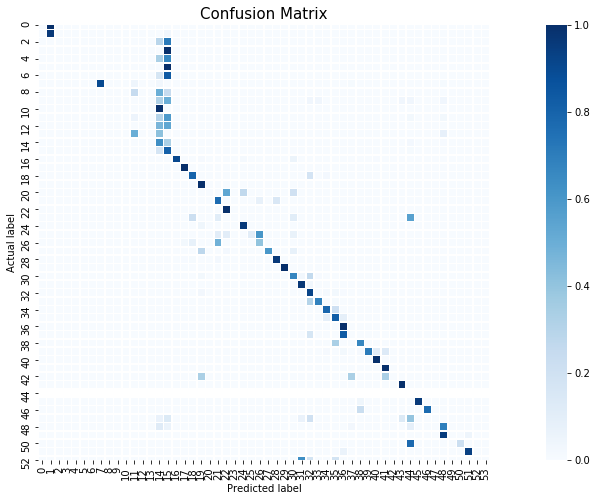

In [49]:
classes = list(range(0,62))
y=[]
y_pred = []

for i in range(labels_test.shape[0]):

  for j in range(len(classes)):

    if(labels_test[i][j]==1):
      y.append(j)
      #print(y)


print(len(y))
print(y[0])

#Confusion Matrix for testing data
cm_test = confusion_matrix(y, y_te_pred)
cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]  #To nomalize the confusion matrix

d_cm_test=np.diagonal(cm_test)
acc_score_test = accuracy_score(y, y_te_pred)

import seaborn as sns
f = plt.figure(figsize=(20,8))
ax=f.add_subplot(1,1,1)
sns.heatmap(cm_test, annot=False, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues',ax=ax, vmin=0, vmax=1)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
'Accuracy Score: {0}'.format(acc_score_test)
ax.set_title('Confusion Matrix', size = 15);
plt.show()